In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from pathlib import Path
import cv2
import os
from PIL import Image

In [5]:
#for importing the zip file
import zipfile

# Specifying the path to the zip file
zip_file_path = 'archive(3).zip'

In [6]:
from zipfile import ZipFile 

# Replace the path to your zip file and the directory where you want to extract the contents
zip_file_path = r"C:\Users\KIIT\Desktop\ML-Project-Eye disease\archive (3).zip"
extracted_dir = r"C:\Users\KIIT\Desktop\ML-Project-Eye disease\extracted_data"# Specify the directory where you want to extract

# Create a zip object and extract the contents to the specified directory
with ZipFile(zip_file_path, 'r') as zObject:
    zObject.extractall(path=extracted_dir)


In [7]:
glaucoma = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/glaucoma")
diabetic_retinopathy = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/diabetic_retinopathy")
cataract = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/cataract")
normal = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/normal")

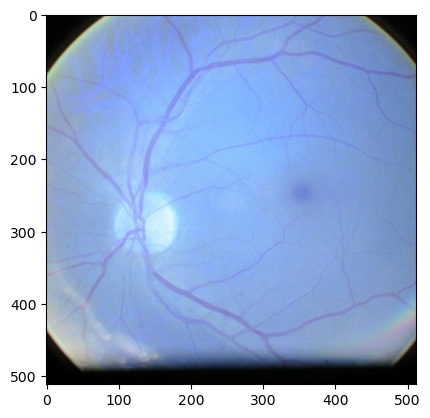

In [8]:
img1= cv2.imread("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/diabetic_retinopathy/100_right.jpeg")
plt.imshow(img1)

In [9]:
img1.shape

(512, 512, 3)

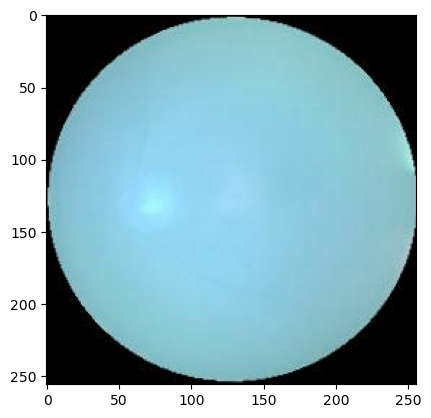

In [10]:
img2=cv2.imread("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/cataract/_7_2330751.jpg")
plt.imshow(img2)

In [11]:
img2.shape

(256, 256, 3)

In [12]:
resized_glaucoma = "C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-1"
resized_diabetic_retinopathy = "C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-2"
resized_cataract = "C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-3"
resized_normal = "C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-4"

In [13]:
for filename in os.listdir(glaucoma):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(glaucoma, filename))
        rezimg = cv2.resize(img, (250,250))
        output_path = os.path.join(resized_glaucoma, filename)
        cv2.imwrite(output_path, rezimg)

In [14]:
for filename in os.listdir(diabetic_retinopathy):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(diabetic_retinopathy, filename))
        rezimg = cv2.resize(img, (250,250))
        output_path = os.path.join(resized_diabetic_retinopathy, filename)
        cv2.imwrite(output_path, rezimg)

In [15]:
for filename in os.listdir(cataract):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(cataract, filename))
        rezimg = cv2.resize(img, (250,250))
        output_path = os.path.join(resized_cataract, filename)
        cv2.imwrite(output_path, rezimg)

In [16]:
for filename in os.listdir(normal):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(normal, filename))
        rezimg = cv2.resize(img, (250,250))
        output_path = os.path.join(resized_normal, filename)
        cv2.imwrite(output_path, rezimg)

In [17]:
# Define the directories for different disease types as Path objects
resized_glaucoma = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-1")
resized_cataract = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-3")
resized_normal = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/resized_dataset/resized img-4")
resized_diabetic_retinopathy = Path("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-2")

# List of disease type directories
disease_type = [resized_glaucoma, resized_cataract, resized_normal, resized_diabetic_retinopathy]

# Create a list to collect data
data = []

# Loop through the disease type directories
from tqdm import tqdm
for disease_dir in disease_type:
    for image_path in tqdm(list(disease_dir.iterdir()), desc=str(disease_dir)):
        data.append({'image': str(image_path), 'disease_type': disease_type.index(disease_dir)})

# Create the DataFrame outside the loop
df = pd.DataFrame(data)

# Verify the resulting DataFrame
print(df.head())


C:\Users\KIIT\Desktop\ML-Project-Eye disease\extracted_data\dataset\resized img-1: 100%|█| 906/906 [00:00<00:00, 113089
C:\Users\KIIT\Desktop\ML-Project-Eye disease\extracted_data\dataset\resized img-3: 100%|█| 938/938 [00:00<00:00, 220406
C:\Users\KIIT\Desktop\ML-Project-Eye disease\extracted_data\resized_dataset\resized img-4: 100%|█| 1074/1074 [00:00<00:
C:\Users\KIIT\Desktop\ML-Project-Eye disease\extracted_data\dataset\resized img-2: 100%|█| 1098/1098 [00:00<00:00, 1371

                                               image  disease_type
0  C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...             0
1  C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...             0
2  C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...             0
3  C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...             0
4  C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...             0


In [18]:
df

,image,disease_type
0,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,0
1,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,0
2,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,0
3,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,0
4,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,0
...,...,...
4011,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,3
4012,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,3
4013,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,3
4014,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...,3


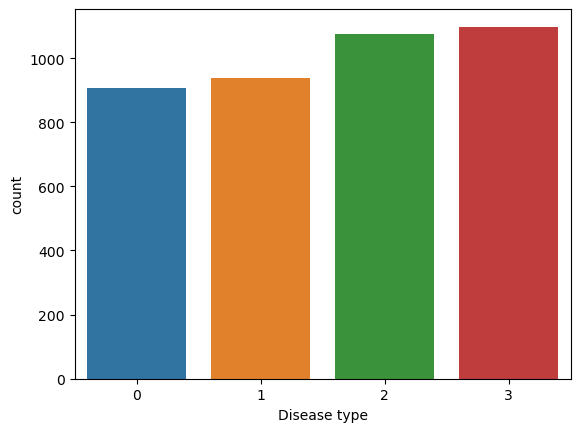

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='disease_type', data=df)
plt.xlabel("Disease type")
plt.show()


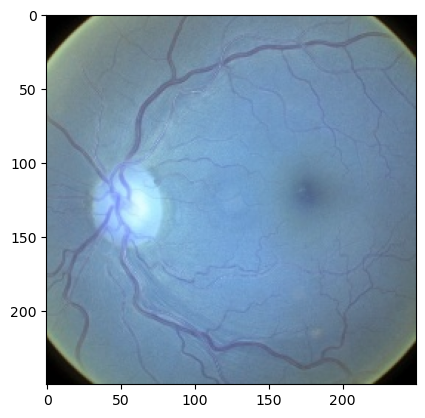

In [20]:
img3=cv2.imread("C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/dataset/resized img-2/108_right.jpeg")
plt.imshow(img3)

In [21]:
img3.shape

(250, 250, 3)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df[['image']]
y = df[['disease_type']]

In [24]:
x

,image
0,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
1,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
2,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
3,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
4,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
...,...
4011,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
4012,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
4013,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
4014,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...


In [25]:
y

,disease_type
0,0
1,0
2,0
3,0
4,0
...,...
4011,3
4012,3
4013,3
4014,3


In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   disease_type  4016 non-null   int64
dtypes: int64(1)
memory usage: 31.5 KB


In [27]:
def path_to_array(image_path, target_size=(250, 250)):
    try:
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, target_size)
            image = image / 255.0
            return image
        else:
            print(f"Error loading image: {image_path}")
            return None
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(str(e))
    return None

In [28]:
x_train,X_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [29]:
x_train.shape

(3212, 1)

In [30]:
x_train

,image
2133,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
1951,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
1464,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
3001,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
1798,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
...,...
3441,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
1344,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
527,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...
3197,C:\Users\KIIT\Desktop\ML-Project-Eye disease\e...


In [31]:
X_train_1 = []

for index, row in x_train.iterrows():
    image_path_1 = row['image']
    image_array_1 = path_to_array(image_path_1)
    
    if image_array_1 is not None:
        X_train_1.append(image_array_1)

In [32]:
X_train_1

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0., 0., 0.],
         [0., 0., 0.],
         

In [33]:
X_train_1 = np.array(X_train_1)
X_train_1

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [34]:
X_train_1.shape

(3212, 250, 250, 3)

In [35]:
y_train

,disease_type
2133,2
1951,2
1464,1
3001,3
1798,1
...,...
3441,3
1344,1
527,0
3197,3


In [36]:
y_train = np.array(y_train)

In [37]:
y_train

array([[2],
       [2],
       [1],
       ...,
       [0],
       [3],
       [1]], dtype=int64)

In [38]:
y_train.shape

(3212, 1)

In [39]:
X_test_1 = []

for index, row in X_test.iterrows():
    image_path_1 = row['image']
    image_array_1 = path_to_array(image_path_1)
    
    if image_array_1 is not None:
        X_test_1.append(image_array_1)

In [40]:
X_test_1 

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.01960784, 0.        , 0.00392157],
        

In [41]:
X_test_1 = np.array(X_test_1)

In [42]:
Y_test

,disease_type
1382,1
3722,3
2740,2
449,0
1377,1
...,...
3307,3
2923,3
2981,3
241,0


In [43]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(250,250,3)),  # Input layer for images
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),   # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),                  # Max-pooling layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),   # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),                  # Max-pooling layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),                  # Max-pooling layer
    tf.keras.layers.Flatten(),                              # Flatten layer
    tf.keras.layers.Dense(128, activation='relu'),          # Fully connected layer
    tf.keras.layers.Dense(4, activation='softmax') # Output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

In [45]:
model.fit(X_train_1,y_train, epochs=10)

Epoch 1/10
101/101 [==============================] - 236s 2s/step - loss: 0.9836 - accuracy: 0.5663
Epoch 2/10
101/101 [==============================] - 203s 2s/step - loss: 0.6541 - accuracy: 0.7332
Epoch 3/10
101/101 [==============================] - 201s 2s/step - loss: 0.5536 - accuracy: 0.7699
Epoch 4/10
101/101 [==============================] - 221s 2s/step - loss: 0.5135 - accuracy: 0.7874
Epoch 5/10
101/101 [==============================] - 219s 2s/step - loss: 0.4820 - accuracy: 0.8029
Epoch 6/10
101/101 [==============================] - 214s 2s/step - loss: 0.4485 - accuracy: 0.8166
Epoch 7/10
101/101 [==============================] - 229s 2s/step - loss: 0.4243 - accuracy: 0.8291
Epoch 8/10
101/101 [==============================] - 198s 2s/step - loss: 0.4146 - accuracy: 0.8337
Epoch 9/10
101/101 [==============================] - 195s 2s/step - loss: 0.3821 - accuracy: 0.8422
Epoch 10/10
101/101 [==============================] - 202s 2s/step - loss: 0.3710 - accura

In [46]:
model.evaluate(X_test_1, Y_test)

26/26 [==============================] - 14s 502ms/step - loss: 0.5138 - accuracy: 0.8047


[0.5138171911239624, 0.8047263622283936]

In [60]:
import joblib
joblib.dump(model,"EYE DISEASE PREDICTION.joblib")

['EYE DISEASE PREDICTION.joblib']

In [61]:
disease_predictor=joblib.load("EYE DISEASE PREDICTION.joblib")

In [62]:
disease_predictor

In [63]:
input_data=[image_path]

In [64]:
import cv2
import numpy as np

# Load image
sample_image_path = "C:/Users/KIIT/Desktop/ML-Project-Eye disease/extracted_data/resized_dataset/resized img-2/111_left.jpeg"

try:
    sample_image = cv2.imread(sample_image_path)
    
    if sample_image is None:
        raise Exception(f"Cannot open or find the image: {sample_image_path}")
    
    # Convert to RGB color mode
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    
    # Resize image
    sample_image=cv2.resize(sample_image,(250,250))
    
    # Normalize pixel values to be between 0 and 1
    sample_image = sample_image / 255.0
    
    # Reshape image for prediction
    sample_image=sample_image.reshape(1,250,250,3)
    
    prediction=loaded_model.predict(sample_image)
    predicted_class=np.argmax(prediction)
    print(f'Predicted Class:{predicted_class}')
    
except Exception as e:
    print(f"Error occurred: {e}")

1/1 [==============================] - 0s 62ms/step
Predicted Class:3
